<a href="https://colab.research.google.com/github/Konic-NLP/5922-deep-learning/blob/main/lab_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

check the device and see the type of GPU

In [ ]:
! nvidia-smi

Mon Feb 14 03:05:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |   2360MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#read the built-in data 
from keras.datasets import cifar10
(trainx,trainy),(testx,testy) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
#have a look the dataset
import numpy as np
print(trainx.shape,trainy.shape)

(50000, 32, 32, 3) (50000, 1)


concanate two parts into a whole


In [ ]:
X=np.vstack((trainx,testx))
Y=np.vstack((trainy,testy))

#ensure the concanating works

In [ ]:
print(X.shape,Y.shape)

(60000, 32, 32, 3) (60000, 1)


split the data according to the ratio

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=1,stratify=Y)

In [ ]:
trainx,x_val,trainy,y_val=train_test_split(x_train,y_train,test_size=0.25,shuffle=True,random_state=1,stratify=y_train)


In [ ]:
print(x_train.shape,y_train.shape)

(48000, 32, 32, 3) (48000, 1)


switch the class digit to one-hot

In [ ]:
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy)
y_val = to_categorical(y_val)

In [ ]:
y_train=to_categorical(y_train)

view the split result and ensure everything is ok

In [ ]:
print(trainx.shape,x_val.shape,x_test.shape,trainy.shape,y_val.shape,trainy[0].shape,y_val[0].shape)

(36000, 32, 32, 3) (12000, 32, 32, 3) (12000, 32, 32, 3) (36000, 10) (12000, 10) (10,) (10,)


#Part A: 


*   no regularization



1.   single-convolution layer without regularization





In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import time
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_base = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 14400)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               1843328   
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,846,410
Trainable params: 1,846,410
Non-trainable params: 0
___________________________________________

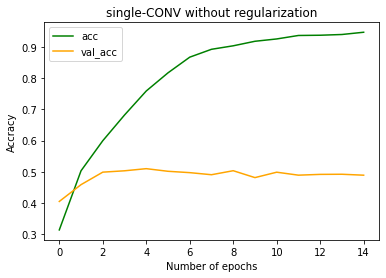

In [ ]:
drawplot("single-CONV without regularization",trained_model_base)

2.   2-layers without regularization





In [ ]:
from keras import regularizers
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_2layer = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 2304)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

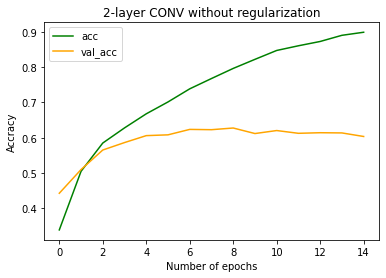

In [ ]:
drawplot("2-layer CONV without regularization",trained_2layer)

3.3-layer without regulairzation

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_3layer = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 2, 2, 64)       

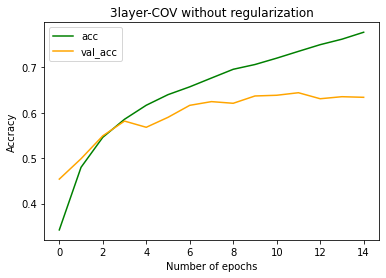

In [ ]:
drawplot("3layer-COV without regularization",trained_model_3layer)



*   with L2 regularization lambda=0.00005
4. one convolutional layer with L2 regularization 






In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import time
from keras import regularizers
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3),kernel_regularizer=regularizers.l2(0.00005)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu",kernel_regularizer=regularizers.l2(0.00005)))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_1layer_L2 = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 14400)             0         
                                                                 
 dense_24 (Dense)            (None, 128)               1843328   
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,846,410
Trainable params: 1,846,410
Non-trainable params: 0
___________________________________________

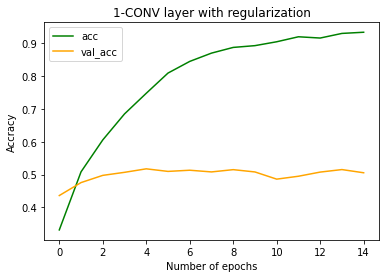

In [ ]:
drawplot("1-CONV layer with regularization",trained_model_1layer_L2)

5.2-layer convolutional layers with regularization

In [ ]:
#model 2 one-layer with L2 regularization
from keras import regularizers
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3),kernel_regularizer=regularizers.l2(0.00005)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = 3, activation = "relu",kernel_regularizer=regularizers.l2(0.00005)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu",kernel_regularizer=regularizers.l2(0.00005)))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_2layer_L2 = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 2304)              0         
                                                                 
 dense_26 (Dense)            (None, 128)             

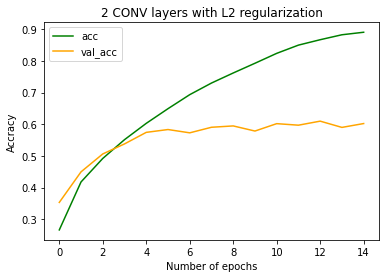

In [ ]:
drawplot("2 CONV layers with L2 regularization",trained_model_2layer_L2)

6. 3-layer convolutional layers with regularization

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3),kernel_regularizer=regularizers.l2(0.00005)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = 3, activation = "relu", kernel_regularizer=regularizers.l2(0.00005)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = 3, activation = "relu", kernel_regularizer=regularizers.l2(0.00005)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu",kernel_regularizer=regularizers.l2(0.00005)))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_3layer_L2 = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 2, 2, 64)       

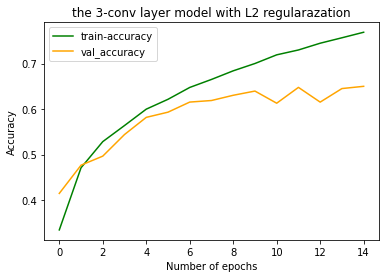

In [ ]:
plt.plot(trained_model_3layer_L2.history["accuracy"], color ="green", label = "train-accuracy")

# plt.plot(trained_model_base.history["val_loss"], color ="red", label = "base-test")
plt.plot(trained_model_3layer_L2.history["val_accuracy"], color ="orange", label = "val_accuracy")

plt.title("the 3-conv layer model with L2 regularazation")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()



*  Drop out with doup out rate=0.1

7. 1 layer convolutional layer with dropout



In [ ]:
# single convolutional layer with dropout
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import time
from tensorflow.python.keras.layers.core import Dropout
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_base_dp = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 module_wrapper (ModuleWrapp  (None, 15, 15, 64)       0         
 er)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 14400)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1843328   
                                                                 
 module_wrapper_1 (ModuleWra  (None, 128)             

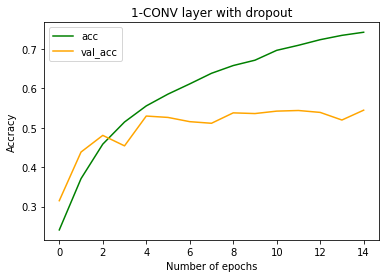

In [ ]:
drawplot("1-CONV layer with dropout",trained_model_base_dp)

8. 2-layer with dropout

In [ ]:
# 2 convolutional layer with dropout
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import time
from tensorflow.python.keras.layers.core import Dropout
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_2layer_DP = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 module_wrapper_2 (ModuleWra  (None, 15, 15, 64)       0         
 pper)                                                           
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

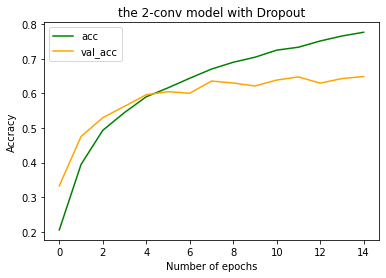

In [ ]:
drawplot("the 2-conv model with Dropout",trained_model_2layer_DP)

9. 3-CONV layer with dropout

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_3layer_DP = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_19 (ModuleWr  (None, 15, 15, 64)       0         
 apper)                                                          
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

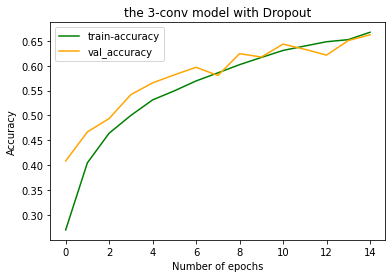

In [ ]:
plt.plot(trained_model_3layer_DP.history["accuracy"], color ="green", label = "train-accuracy")

# plt.plot(trained_model_base.history["val_loss"], color ="red", label = "base-test")
plt.plot(trained_model_3layer_DP.history["val_accuracy"], color ="orange", label = "val_accuracy")

plt.title("the 3-conv model with Dropout")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()



*   batch normalization
10. 1-layer CONV with batch normalization



In [ ]:
#10 1 layer Batch Normalization

from keras import regularizers
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_BN = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_9 (ModuleWra  (None, 15, 15, 64)       256       
 pper)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 14400)             0         
                                                                 
 dense_28 (Dense)            (None, 128)               1843328   
                                                                 
 module_wrapper_10 (ModuleWr  (None, 128)            

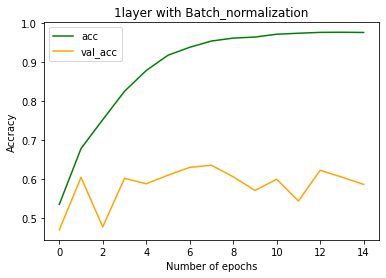

In [ ]:
drawplot("1layer with Batch_normalization",trained_model_BN)

11. 2-CONV layer with batch normalization

In [ ]:

from keras import regularizers
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_2layer_BN = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_11 (ModuleWr  (None, 15, 15, 64)       256       
 apper)                                                          
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

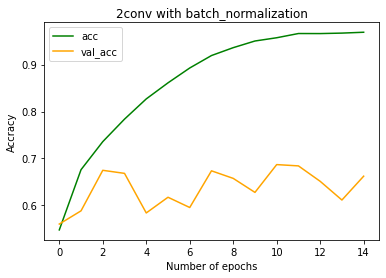

In [ ]:
drawplot("2conv with batch_normalization",trained_model_2layer_BN)

12. 3-layer with batch normalization

In [ ]:
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
trained_model_3layer_BN = model.fit(trainx,trainy, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_5 (ModuleWra  (None, 15, 15, 64)       256       
 pper)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                      

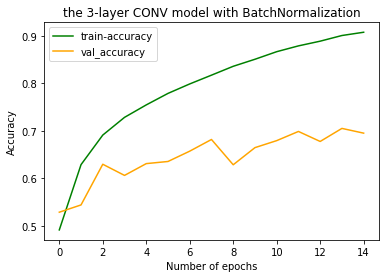

In [ ]:
plt.plot(trained_model_3layer_BN.history["accuracy"], color ="green", label = "train-accuracy")

# plt.plot(trained_model_base.history["val_loss"], color ="red", label = "base-test")
plt.plot(trained_model_3layer_BN.history["val_accuracy"], color ="orange", label = "val_accuracy")

plt.title("the 3-layer CONV model with BatchNormalization")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()



*   best model with 'all' training data



In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
start=time.time()
bestmodel = model.fit(x_train,y_train, epochs = 15, batch_size = 64,  shuffle=True)
end=time.time()
runtime=(end-start)/60
print("running time is %.2f minutes"%runtime)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_18 (ModuleWr  (None, 15, 15, 64)       256       
 apper)                                                          
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

In [ ]:
# evaluate on the test data 
y_test=to_categorical(y_test)
score=model.evaluate(x_test,y_test,verbose=0)

In [ ]:
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))

Test loss: 1.0475
Test accuracy: 72.09


In [ ]:
# define a function to draw the training accuracy and test accuracy
from matplotlib import pyplot as plt
def drawplot(name,modelfordraw):
  plt.plot(modelfordraw.history["accuracy"], color ="green", label = "acc")

  # plt.plot(trained_model_base.history["val_loss"], color ="red", label = "base-test")
  plt.plot(modelfordraw.history["val_accuracy"], color ="orange", label = "val_acc")

  plt.title(name)
  plt.ylabel("Accracy")
  plt.xlabel("Number of epochs")
  plt.legend()
  plt.show()

part **B**

define three functions with three different regularization techniques combined with a two-layers convolutional models

1.Batch_nomrlization with 50% data

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import time
def BN(portion=1):
  model = Sequential()

  model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(128, activation = "relu"))
  model.add(BatchNormalization())
  model.add(Dense(10, activation = "softmax"))

  model.summary()
  if portion!=1:

    partx,_,party,_=train_test_split(trainx,trainy,test_size=1-portion,random_state=1,shuffle=True,stratify=trainy)
  else:
    partx,party=trainx,trainy
  model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
  start=time.time()
  trained_model_2layer_BN = model.fit(partx,party, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
  end=time.time()
  runtime=(end-start)/60
  print("running time is %.2f minutes"%runtime)
  return trained_model_2layer_BN

In [ ]:
model50=BN(0.5)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_35 (ModuleWr  (None, 15, 15, 64)       256       
 apper)                                                          
                                                                 
 conv2d_37 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

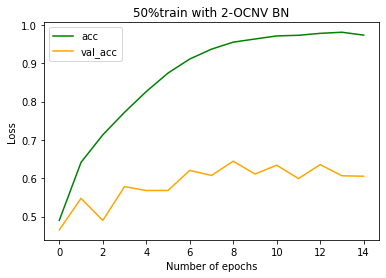

In [ ]:
# plt.plot(trained_model_base.history["loss"], color ="blue", label = "base-train")
plt.plot(model50.history["accuracy"], color ="green", label = "acc")

# plt.plot(trained_model_base.history["val_loss"], color ="red", label = "base-test")
plt.plot(model50.history["val_accuracy"], color ="orange", label = "val_acc")

plt.title("50%train with 2-OCNV BN")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

2. 75% data with BN and two-conv layers

In [ ]:
model75=BN(0.75)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_38 (ModuleWr  (None, 15, 15, 64)       256       
 apper)                                                          
                                                                 
 conv2d_39 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

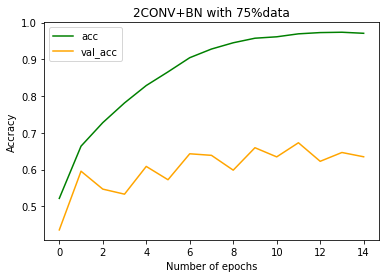

In [ ]:
drawplot("2CONV+BN with 75%data",model75)

In [ ]:
BN100=BN()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 15, 15, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

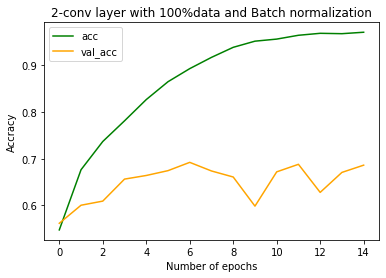

In [ ]:
drawplot('2-conv layer with 100%data and Batch normalization',BN100)

3. dropout with 50% data

In [ ]:
from tensorflow.python.keras.layers.core import Dropout
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
def DP(portion=1):
  model = Sequential()

  model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3)))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.1))
  model.add(Conv2D(64, kernel_size = 3, activation = "relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.1))
  model.add(Flatten())
  model.add(Dense(128, activation = "relu"))
  model.add(Dropout(0.1))
  model.add(Dense(10, activation = "softmax"))

  model.summary()
  if portion!=1:
    partx,_,party,_=train_test_split(trainx,trainy,test_size=1-portion,random_state=1,shuffle=True,stratify=trainy)
  else:
    partx,party=trainx,trainy
  model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
  start=time.time()
  trained_model_2layer_DP = model.fit(partx,party, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
  end=time.time()
  runtime=(end-start)/60
  print("running time is %.2f minutes"%runtime)
  return trained_model_2layer_DP

In [ ]:
DP50=DP(0.5)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_41 (ModuleWr  (None, 15, 15, 64)       0         
 apper)                                                          
                                                                 
 conv2d_41 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

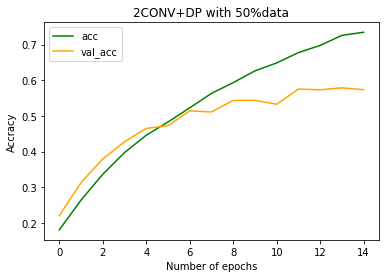

In [ ]:
drawplot("2CONV+DP with 50%data",DP50)

75% data with dropout

In [ ]:
DP75=DP(0.75)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 module_wrapper_44 (ModuleWr  (None, 15, 15, 64)       0         
 apper)                                                          
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

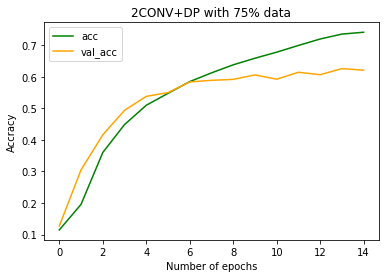

In [ ]:
drawplot("2CONV+DP with 75% data",DP75)

In [ ]:
DP100=DP()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 module_wrapper (ModuleWrapp  (None, 15, 15, 64)       0         
 er)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

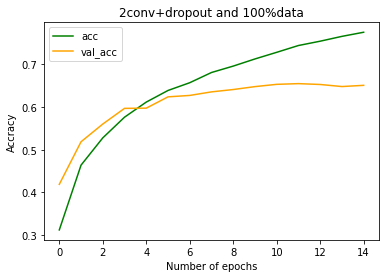

In [ ]:
drawplot("2conv+dropout and 100%data",DP100)

In [ ]:
from keras import regularizers
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import time
def L2(portion=1):
  model = Sequential()
  model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (32, 32, 3),kernel_regularizer=regularizers.l2(0.00005)))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(64, kernel_size = 3, activation = "relu", kernel_regularizer=regularizers.l2(0.00005)))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation = "relu",kernel_regularizer=regularizers.l2(0.00005)))
  model.add(Dense(10, activation = "softmax"))
  model.summary()
  if portion !=1:
    partx,_,party,_=train_test_split(trainx,trainy,test_size=1-portion,random_state=1,shuffle=True,stratify=trainy)
  else:
    partx,party=trainx,trainy
  model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
  start=time.time()
  trained_model_3layer_L2 = model.fit(partx,party, epochs = 15, batch_size = 64, validation_data=(x_val,y_val),shuffle=True)
  end=time.time()
  runtime=(end-start)/60
  print("running time is %.2f minutes"%runtime)
  return trained_model_3layer_L2

In [ ]:
L250=L2(0.5)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 2304)              0         
                                                                 
 dense_46 (Dense)            (None, 128)             

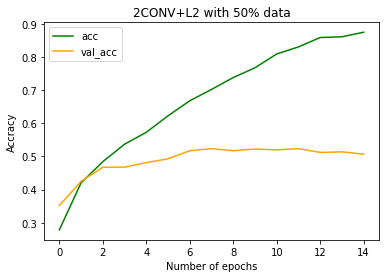

In [ ]:
drawplot("2CONV+L2 with 50% data",L250)

In [ ]:
L275=L2(0.75)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 2304)              0         
                                                                 
 dense_48 (Dense)            (None, 128)             

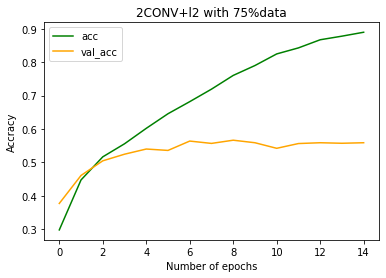

In [ ]:
drawplot("2CONV+l2 with 75%data",L275)

In [ ]:
L2100=L2()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

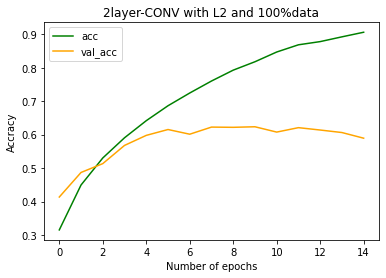

In [ ]:
drawplot("2layer-CONV with L2 and 100%data",L2100)